In [1]:
import glob
import numpy as np

# cognac data and tools
import cognac.insitu as insi

---
## load and select data

alees gps files may have to be edited manually 

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
campaign = 'lopstech19_leg2.yaml'

cp = insi.utils.campaign(campaign)

In [3]:
# data directory and filename
#
#cp = insi.utils.campaign('microco_leg2.yaml')

label = 'arecorder'

data_dir = cp[label]['path']+'gps/'
#ll_lim = [6., 6.3, 42.8, 43.1]

gps_files = sorted(glob.glob(data_dir+'alees/*G7.DAT')) #[:2]
gps_all = insi.gps.read_gps_alees(gps_files, label=label, verbose=False)

Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102606G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102716G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102717G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102718G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102719G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102720G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102721G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistreur/gps/alees/102722G7.DAT
Reads /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/enregistre

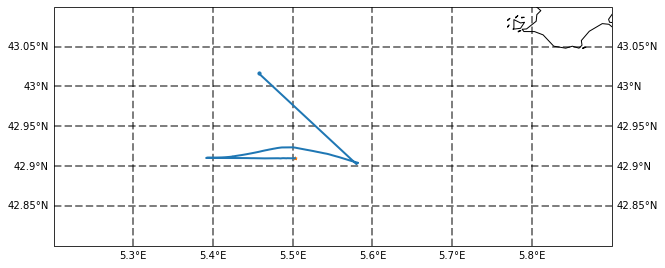

In [4]:
fac = insi.utils.plot_map(cp=cp)
gps_all.plot(fac)

In [5]:
gps_all.plot_bk(unit=cp['arecorder'], rule='1T')

Loading BokehJS ...

---
## trim data

Look at acoustic data in order to choose time of deployment and recovery

In [6]:
#
# clean gps data with deployment log
gps={}
for r in cp['arecorder']:
    gps[r.label] = gps_all.clean(r, inplace=False)

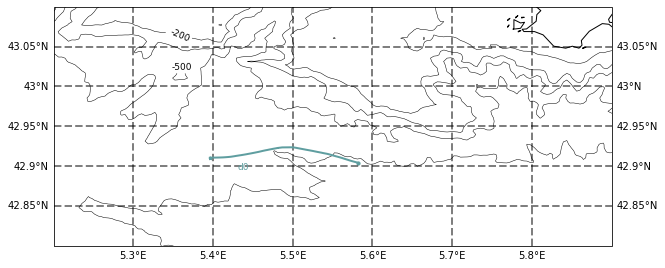

In [7]:
# plot overview map
fac = insi.utils.plot_map(cp=cp)
insi.utils.plot_bathy(fac)
for label, lgps in gps.items():
    lgps.plot(fac, label=label, color=cp['arecorder']['color'])

--- 
## store

In [8]:
for label, lgps in gps.items():
    lgps.to_pickle(cp.pathp+'arecorder_gps_'+label+'.p')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2019_lopstech/leg2/data/datap/arecorder_gps_d0.p
